## Live stats 6 Hypothesis testing: significance thresholds and multiple hypothesis tests

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
from scipy.stats import binom_test

In [2]:
monthly_report = pd.read_csv('https://raw.githubusercontent.com/Codecademy/Master-Statistics-Live-Series/main/Codecademy%20Live%20Stats%20%236/monthly_report.csv')
print(monthly_report.head())

             timestamp purchase                       item
0  2020-01-17 17:23:06        y  cue cards - love actually
1  2020-01-25 17:09:39        n                        NaN
2  2020-01-25 05:22:01        n                        NaN
3  2020-01-18 04:33:40        y      t-rex - jurassic park
4  2020-01-24 17:24:52        n                        NaN


In [4]:
print(np.sum(monthly_report.purchase == 'y'))

41


In [12]:
# if we simulate 500 visits, how many purchases do we get with a probability of 0.1
simulated_visitors = np.random.choice(['y', 'n'], size = 500, p=[.1, .9])
purchases = np.sum(simulated_visitors == 'y')
p_value = binom_test(purchases, 500, .1, alternative='less')
print(purchases, p_value)

46 0.3060437171243919


In [14]:
#null hypothesis: purchase is 10%
#alternative hypothesis: purchase rate is <10%
#so probability of observing 46 or fewer purchases is 30% if pr 10%
# actually we are running the test with the null hyp true "p=.1"

In [15]:
p_value = binom_test(69, 500, .1, alternative='less')
print(p_value)

0.9972892817337355


In [16]:
#run a binomial test for each simulation
p_vals = []
for i in range(1000):
    simulated_visitors = np.random.choice(['y', 'n'], size = 500, p=[.1, .9])
    purchases = np.sum(simulated_visitors == 'y')
    p_value = binom_test(purchases, 500, .1)
    p_vals.append(p_value)

(array([ 89.,  70., 137.,  68.,  85.,  88., 114., 102., 135., 112.]),
 array([0.00277664, 0.10249898, 0.20222131, 0.30194365, 0.40166599,
        0.50138832, 0.60111066, 0.70083299, 0.80055533, 0.90027766,
        1.        ]),
 <a list of 10 Patch objects>)

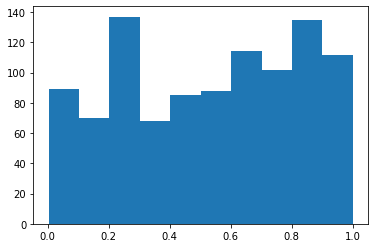

In [17]:
plt.hist(p_vals)
#a uniform distribution - equally likely to get p-value between 0-1

In [18]:
#p-value below threshold but falsely accept null hypothesis
type_1_errors = 0

for i in range(1000):
    simulated_visitors = np.random.choice(['y', 'n'], size = 500, p=[.1, .9])
    purchases = np.sum(simulated_visitors == 'y')
    p_value = binom_test(purchases, 500, .1)
    if p_value < 0.05:
        type_1_errors += 1

print(type_1_errors/10000)

0.0044
